# File Description

This notebook is for determining the best way to discretise the MSL data from Antonio

# File Setup

##
How does the order of magnitude vary betwene the lagoon and the ocean?
which is most sensitive to waves? How would that interact with topography?

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
import os
import json
from datetime import datetime
import pysmile
import sys
import json
sys.path.append('C:\\Users\\shannonb\\Documents\\Model_and_data\\python_classes')
import rpy2
import copy
os.environ['R_HOME'] = 'C:\ProgramData\Anaconda3\Lib\R'
%load_ext rpy2.ipython

from BNModel import BNModel

from BN_Antonio_preprocessing_approach2 import *


C:\ProgramData\Anaconda3\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


In [3]:
### set location of file storage
folder = 'BN_antonio_data'
try:
    os.makedirs(folder)
except FileExistsError:
    pass

# Data Prep

In [4]:
# Import and preprocess data
df_ocean,ocean_data_dict = BN_Antonio_preprocessing_ocean()

In [5]:
### HOW TO INCLUDE TEMPORAL ASPECT ??

## Create Variable Dictionary

In [6]:
ocean_model_dict = {
   'variables':{
       'Tm_point_218':{
            'label':'Wave period at point 218 (s)',
            'discretisation':{
                'n_bins':7,
                'strategy':'kmeans',
                'bin_names':['VeryLow','Low','LowMid','Mid','HighMid','High','VeryHigh']
            },
            'child_nodes':['TWL_point_218_less_Tide_less_MSL']
        },
        'Hs_point_218':{
            'label':'Wave height at point 218 (m)',
            'discretisation':{
                'n_bins':7,
                'strategy':'kmeans',
                'bin_names':['VeryLow','Low','LowMid','Mid','HighMid','High','VeryHigh']
            },
            'child_nodes':['TWL_point_218_less_Tide_less_MSL']
        },
        'MSL':{
            'label':'Mean sea level (m)',
            'discretisation':{
                'n_bins':7,
                'strategy':'kmeans',
                'bin_names':['VeryLow','Low','LowMid','Mid','HighMid','High','VeryHigh']
            },
            'child_nodes':['TWL_point_218_less_Tide_less_MSL']
        },
        'MEI':{
            'label':'Multivariate ENSO index',
            'discretisation':{
                'n_bins':3,
                'strategy':'kmeans',
                'bin_names':['LaNiña','none','ElNiño'],
                'bin_edges':[-3.0,-0.5,0.5,3.0]
            },
            'child_nodes':['MSL']
        },
        'Tide':{
            'label':'Tide (m)',
            'discretisation':{
                'n_bins':7,
                'strategy':'kmeans',
                'bin_names':['VeryLow','Low','LowMid','Mid','HighMid','High','VeryHigh']
            },
            'child_nodes':['TWL_point_218_less_Tide_less_MSL']
        },
        'TWL_point_218_less_Tide_less_MSL':{
            'label':'Total water level at point 218 less tide less mean sea-level(m)',
            'discretisation':{
                'n_bins':7,
                'strategy':'kmeans',
                'bin_names':['VeryLow','Low','LowMid','Mid','HighMid','High','VeryHigh']
            },
            'child_nodes':[]
        }
   },
    'training_frac':0.8,
    'bootstrap_reps':3
}

# Get Binning for MSL

In [7]:
# # Load SLR Projections
# data_location = "C:\\Users\\shannonb\\Documents\\Model_and_data\\Dataset\\D7_MSL_projections\\"
# file_name = "distributions_dict"
# with open("{}{}.json".format(data_location,file_name), 'r') as fp:
#     SL_proj_dict = json.load(fp)
    
# def SLR_proj_extractor(SL_proj_dict,AIS_config,rcp,year):
#     '''
#     Function for getting SLR projections for a given Antarctic icesheet, rcp and year
#     Years start as 2020 and go up in lots of 10 until 2150 (2100 for dp16)
#     '''
#     SLR_prob_dict = SL_proj_dict["('{}', '{}', {})".format(AIS_config,rcp,year)]
#     SLR_median_prob = np.max([float(x) for x in list(SLR_prob_dict.keys())])
#     SLR_median_MSL = float(SLR_prob_dict[str(SLR_median_prob)])/1000 #units is m

#     return(SLR_median_MSL)

# # Get sea-level projections
# k14_26_2050 = SLR_proj_extractor(SL_proj_dict,'k14','26','2050')
# k14_85_2050 = SLR_proj_extractor(SL_proj_dict,'k14','85','2050')
# k14_26_2100 = SLR_proj_extractor(SL_proj_dict,'k14','26','2100')
# k14_85_2100 = SLR_proj_extractor(SL_proj_dict,'k14','85','2100')

# dp21_26_2050 = SLR_proj_extractor(SL_proj_dict,'dp21','26','2050')
# dp21_85_2050 = SLR_proj_extractor(SL_proj_dict,'dp21','85','2050')
# dp21_26_2100 = SLR_proj_extractor(SL_proj_dict,'dp21','26','2100')
# dp21_85_2100 = SLR_proj_extractor(SL_proj_dict,'dp21','85','2100')

# # Add worse case scenario 
# MSL_adjusted_dict = copy.deepcopy(lagoon_data_dict)
# MSL_adjusted_dict['MSL'] = MSL_adjusted_dict['MSL']+dp21_85_2100

# df_MSL_adjusted = copy.deepcopy(df_lagoon)
# df_MSL_adjusted['MSL'] = df_MSL_adjusted['MSL']+dp21_85_2100

# # Create a copy of the model dict to edit
# MSL_model_dict = copy.deepcopy(lagoon_model_dict)

# # Bootstrap and discretise data, and add it to the model_dict
# MSL_adjusted_model_dict = BNModel().bootstrap_data(MSL_model_dict,MSL_adjusted_dict,df_MSL_adjusted)
# MSL_adjusted_model_dict = BNModel().discretiser(MSL_adjusted_model_dict)

# # Adjust lagoon model dict to have MSL bin edges in it to use for discretisation of actual dict
# lagoon_model_dict['variables']['MSL']['discretisation'].update(
#     {'bin_edges':MSL_adjusted_model_dict['variables']['MSL']['bin_edges'][0]
#     })

## Bootstrapping the data

In [8]:
# Bootstrap the data, and add it to the model_dict
ocean_model_dict = BNModel().bootstrap_data(ocean_model_dict,ocean_data_dict,df_ocean)

## Discretise the data

In [9]:
# Discretise the data
ocean_file_label = "ocean"

ocean_model_dict = BNModel().discretiser(ocean_model_dict)

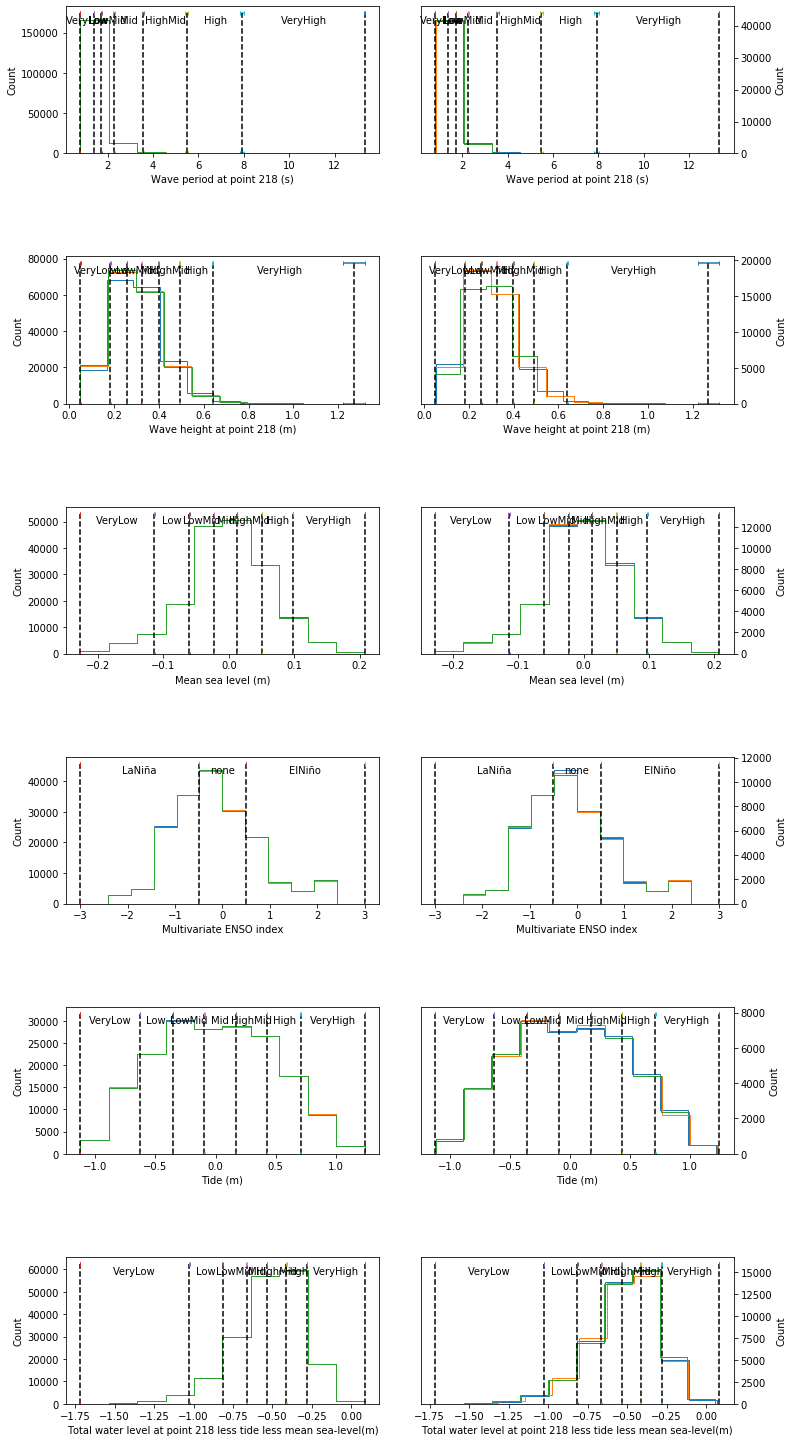

In [10]:
ocean_disc_fig = BNModel().plot_discretiser(ocean_model_dict)

## Save the data

In [11]:
BNModel().save_dataset(ocean_model_dict,ocean_file_label)

# Create BN Model

In [12]:
# Create the BN
ocean_model_dict = BNModel().create_SM(ocean_model_dict,ocean_file_label)

## View Conditional Probability tables

In [83]:
# Get conditional probs tables
df_CPT_MSL = BNModel().get_conditional_prob_table(ocean_model_dict,'MSL')
df_CPT_MSL = df_CPT_MSL.loc[['VeryLow','Low','LowMid','Mid','HighMid','High','VeryHigh']]
df_CPT_MSL[['ElNiño','none','LaNiña']]

MEI,ElNiño,none,LaNiña
MSL,,,
VeryLow,0.145291,0.004690,0.048377
Low,0.058439,0.060695,0.129339
LowMid,0.121483,0.171322,0.321152
Mid,0.161625,0.243097,0.279988
HighMid,0.215634,0.238960,0.164010
High,0.198570,0.210292,0.046472
VeryHigh,0.098958,0.070945,0.010662


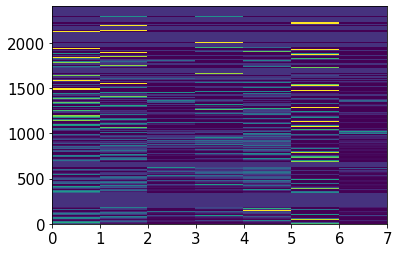

In [89]:
# Get conditional probs tables
df_CPT_MSL = BNModel().get_conditional_prob_table(ocean_model_dict,'TWL_point_218_less_Tide_less_MSL')
plt.pcolor(df_CPT_MSL.T)


            ElNiño    LaNiña      none
MSL                                   
High      0.436098  0.102062  0.461840
HighMid   0.348582  0.265129  0.386289
Low       0.235191  0.520537  0.244272
LowMid    0.197869  0.523086  0.279045
Mid       0.236049  0.408915  0.355036
VeryHigh  0.548047  0.059048  0.392905
VeryLow   0.732469  0.243886  0.023645


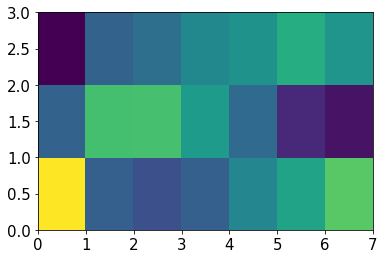

In [84]:

test_dict = {}

for index,row in df_CPT_MSL.T.iterrows():
    test_dict.update({index:(row/np.sum(df_CPT_MSL.T))})
    
#     print(row)
print(pd.DataFrame(atest_dict))

plt.pcolor(pd.DataFrame(test_dict).T)

In [85]:
pd.options.display.max_rows = 999

BNModel().get_conditional_prob_table(ocean_model_dict,'MSL').T

MSL,High,HighMid,Low,LowMid,Mid,VeryHigh,VeryLow
MEI,,,,,,,
ElNiño,0.198570,0.215634,0.058439,0.121483,0.161625,0.098958,0.145291
LaNiña,0.046472,0.164010,0.129339,0.321152,0.279988,0.010662,0.048377
none,0.210292,0.238960,0.060695,0.171322,0.243097,0.070945,0.004690


In [16]:
pd.set_option('display.max_rows', 20)

# Set Evidence

In [17]:
ocean_evidence_dict = {
    'Tide':[0.05,0.8,0.05,0.1,0.01,0.01,0.01],
    'MSL':[0.05,0.8,0.05,0.1,0.01,0.01,0.01]
}

In [18]:
ocean_model_dict = BNModel().add_evidence_to_dict(ocean_model_dict,ocean_evidence_dict)

# Update beliefs based on evidence

In [19]:
# Set evidence and get beliefs
ocean_model_dict = BNModel().update_evidence(ocean_model_dict)

# BN Visualisation

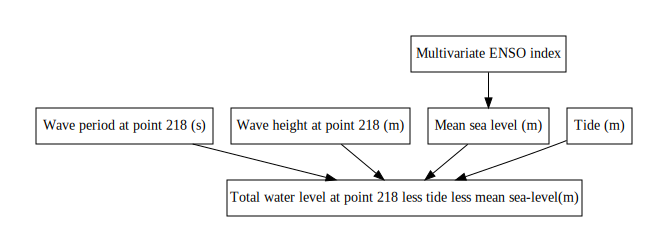

In [20]:

# Set up graph
graph_ocean = BNModel().create_BN_graph()

# Create nodes of the graph
graph_ocean,ocean_model_dict = BNModel().create_nodes(graph_ocean,ocean_model_dict,1)

# Create arcs between nodesb
graph_ocean = BNModel().create_arcs(graph_ocean,ocean_model_dict)

# Save as dot file
graph_ocean.render(filename='graph_ocean',format='png')

# Plot the graph
graph_ocean

# Model Validation

{(0, 'VeryLow'): 0.03596403596403597, (0, 'Low'): 0.10814332247557003, (0, 'LowMid'): 0.1996187835730376, (0, 'Mid'): 0.2775098149186764, (0, 'HighMid'): 0.4341197822141561, (0, 'High'): 0.6060323092725745, (0, 'VeryHigh'): 0.568792934249264, (1, 'VeryLow'): 0.03496503496503497, (1, 'Low'): 0.10260586319218241, (1, 'LowMid'): 0.2025645468722925, (1, 'Mid'): 0.2736960179472799, (1, 'HighMid'): 0.4365698729582577, (1, 'High'): 0.6052852740685405, (1, 'VeryHigh'): 0.5664376840039255, (2, 'VeryLow'): 0.03696303696303696, (2, 'Low'): 0.10814332247557003, (2, 'LowMid'): 0.2008317449315543, (2, 'Mid'): 0.2759394279304543, (2, 'HighMid'): 0.43892921960072595, (2, 'High'): 0.5990288542347558, (2, 'VeryHigh'): 0.5525024533856723}


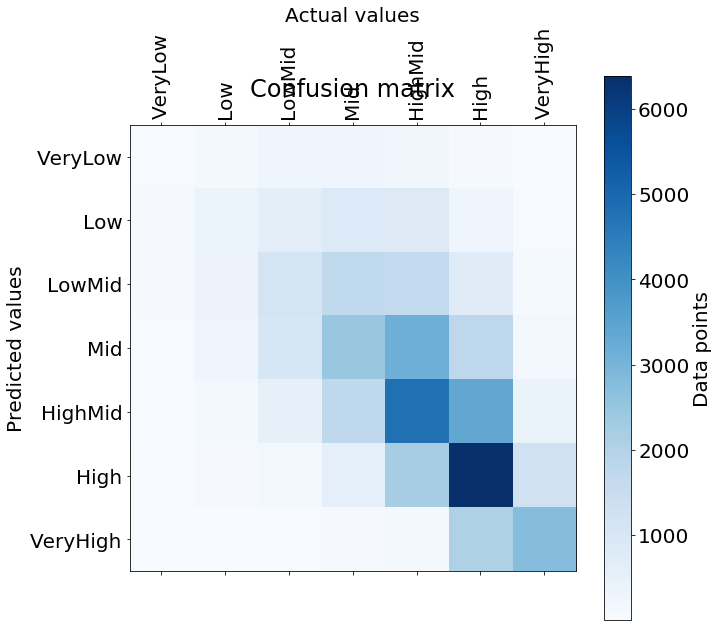

In [21]:

ocean_acc_dict = BNModel().get_accuracies(ocean_model_dict,"TWL_point_218_less_Tide_less_MSL")

print(ocean_acc_dict)

fig, ax = BNModel().confusion_matrix(ocean_model_dict,"TWL_point_218_less_Tide_less_MSL",1)

# Sensitivity Analysis

### MSL on TWL

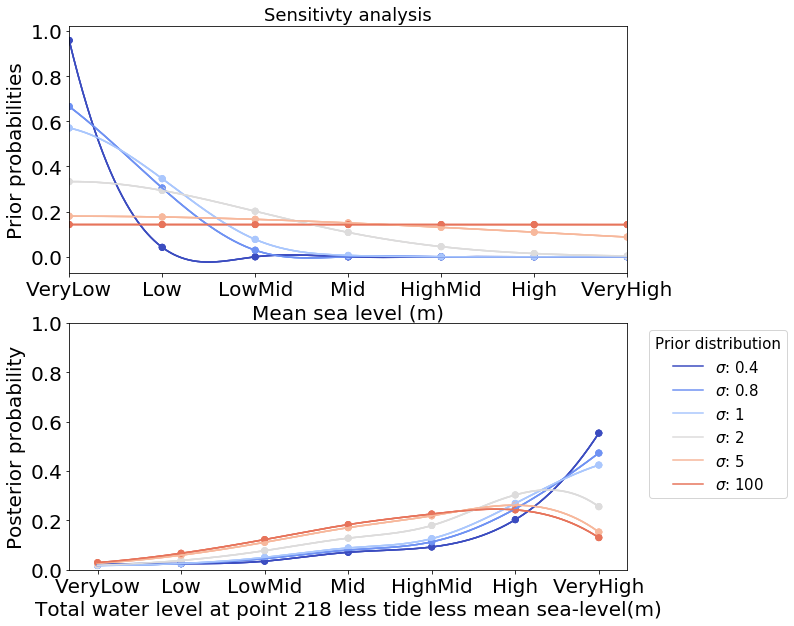

({0:       0.4       0.8       1.0       2.0       5.0       100.0
  0  0.020742  0.017833  0.017142  0.018992  0.026222  0.029013
  1  0.024901  0.024477  0.025501  0.037683  0.059125  0.066872
  2  0.034909  0.045120  0.050188  0.077390  0.111203  0.122381
  3  0.070919  0.080026  0.088399  0.128054  0.170510  0.182966
  4  0.092369  0.113060  0.126089  0.179315  0.218556  0.225825
  5  0.202891  0.246913  0.268710  0.303029  0.261514  0.242662
  6  0.553270  0.472570  0.423972  0.255537  0.152871  0.130282,
  1:       0.4       0.8       1.0       2.0       5.0       100.0
  0  0.020742  0.017833  0.017142  0.018992  0.026222  0.029013
  1  0.024901  0.024477  0.025501  0.037683  0.059125  0.066872
  2  0.034909  0.045120  0.050188  0.077390  0.111203  0.122381
  3  0.070919  0.080026  0.088399  0.128054  0.170510  0.182966
  4  0.092369  0.113060  0.126089  0.179315  0.218556  0.225825
  5  0.202891  0.246913  0.268710  0.303029  0.261514  0.242662
  6  0.553270  0.472570  0.423972

In [22]:
df_MSL_VL_post = BNModel().univariant_sensitivity(ocean_model_dict,'MSL','VeryLow','TWL_point_218_less_Tide_less_MSL')
df_MSL_VL_post

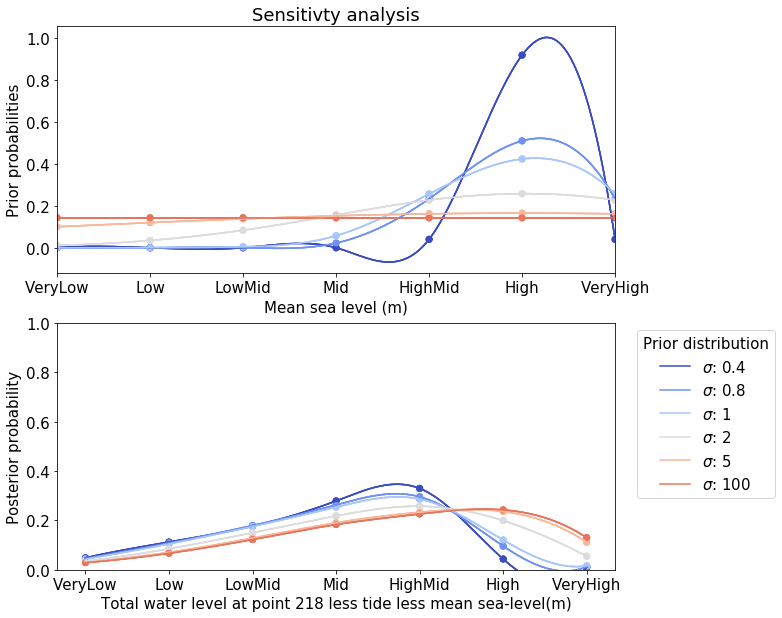

({0:       0.4       0.8       1.0       2.0       5.0       100.0
  0  0.048592  0.045647  0.043596  0.035436  0.030232  0.029023
  1  0.112331  0.108843  0.104675  0.085014  0.070561  0.066903
  2  0.176868  0.179208  0.175263  0.149943  0.128286  0.122427
  3  0.278774  0.262530  0.253648  0.218004  0.190482  0.183019
  4  0.329341  0.295650  0.286191  0.257294  0.232995  0.225861
  5  0.043600  0.095807  0.120644  0.199212  0.236001  0.242594
  6  0.010493  0.012314  0.015983  0.055098  0.111443  0.130174,
  1:       0.4       0.8       1.0       2.0       5.0       100.0
  0  0.048592  0.045647  0.043596  0.035436  0.030232  0.029023
  1  0.112331  0.108843  0.104675  0.085014  0.070561  0.066903
  2  0.176868  0.179208  0.175263  0.149943  0.128286  0.122427
  3  0.278774  0.262530  0.253648  0.218004  0.190482  0.183019
  4  0.329341  0.295650  0.286191  0.257294  0.232995  0.225861
  5  0.043600  0.095807  0.120644  0.199212  0.236001  0.242594
  6  0.010493  0.012314  0.015983

In [23]:
df_MSL_H_post = BNModel().univariant_sensitivity(ocean_model_dict,'MSL','High','TWL_point_218_less_Tide_less_MSL')
df_MSL_H_post

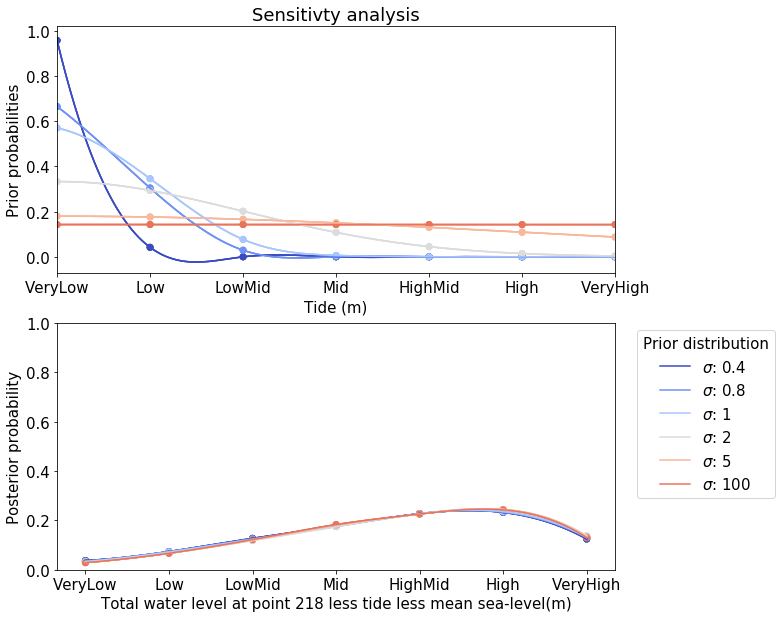

({0:       0.4       0.8       1.0       2.0       5.0       100.0
  0  0.037479  0.035359  0.034249  0.030748  0.029202  0.029021
  1  0.073879  0.073813  0.072742  0.067893  0.066602  0.066892
  2  0.127357  0.125459  0.123938  0.118657  0.120360  0.122405
  3  0.176916  0.176140  0.175539  0.174604  0.179999  0.182990
  4  0.227392  0.226823  0.226778  0.226495  0.225902  0.225841
  5  0.232281  0.233200  0.235295  0.243499  0.244151  0.242614
  6  0.124696  0.129206  0.131460  0.138104  0.133785  0.130236,
  1:       0.4       0.8       1.0       2.0       5.0       100.0
  0  0.037479  0.035359  0.034249  0.030748  0.029202  0.029021
  1  0.073879  0.073813  0.072742  0.067893  0.066602  0.066892
  2  0.127357  0.125459  0.123938  0.118657  0.120360  0.122405
  3  0.176916  0.176140  0.175539  0.174604  0.179999  0.182990
  4  0.227392  0.226823  0.226778  0.226495  0.225902  0.225841
  5  0.232281  0.233200  0.235295  0.243499  0.244151  0.242614
  6  0.124696  0.129206  0.131460

In [24]:
df_MSL_H_post = BNModel().univariant_sensitivity(ocean_model_dict,'Tide','VeryLow','TWL_point_218_less_Tide_less_MSL')
df_MSL_H_post

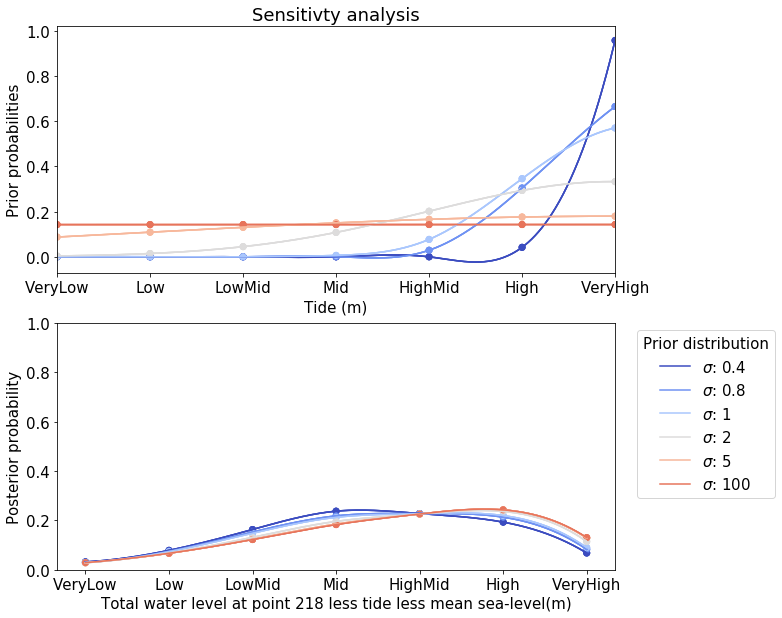

({0:       0.4       0.8       1.0       2.0       5.0       100.0
  0  0.032150  0.030200  0.029650  0.028233  0.028535  0.029019
  1  0.078766  0.075198  0.073656  0.068255  0.066646  0.066893
  2  0.163113  0.152957  0.147925  0.131369  0.123430  0.122413
  3  0.237309  0.218205  0.212364  0.195838  0.185223  0.183004
  4  0.227686  0.227851  0.227165  0.225474  0.225685  0.225841
  5  0.192961  0.212938  0.219516  0.236303  0.242346  0.242609
  6  0.068014  0.082651  0.089723  0.114528  0.128135  0.130221,
  1:       0.4       0.8       1.0       2.0       5.0       100.0
  0  0.032150  0.030200  0.029650  0.028233  0.028535  0.029019
  1  0.078766  0.075198  0.073656  0.068255  0.066646  0.066893
  2  0.163113  0.152957  0.147925  0.131369  0.123430  0.122413
  3  0.237309  0.218205  0.212364  0.195838  0.185223  0.183004
  4  0.227686  0.227851  0.227165  0.225474  0.225685  0.225841
  5  0.192961  0.212938  0.219516  0.236303  0.242346  0.242609
  6  0.068014  0.082651  0.089723

In [25]:
df_MSL_H_post = BNModel().univariant_sensitivity(ocean_model_dict,'Tide','VeryHigh','TWL_point_218_less_Tide_less_MSL')
df_MSL_H_post

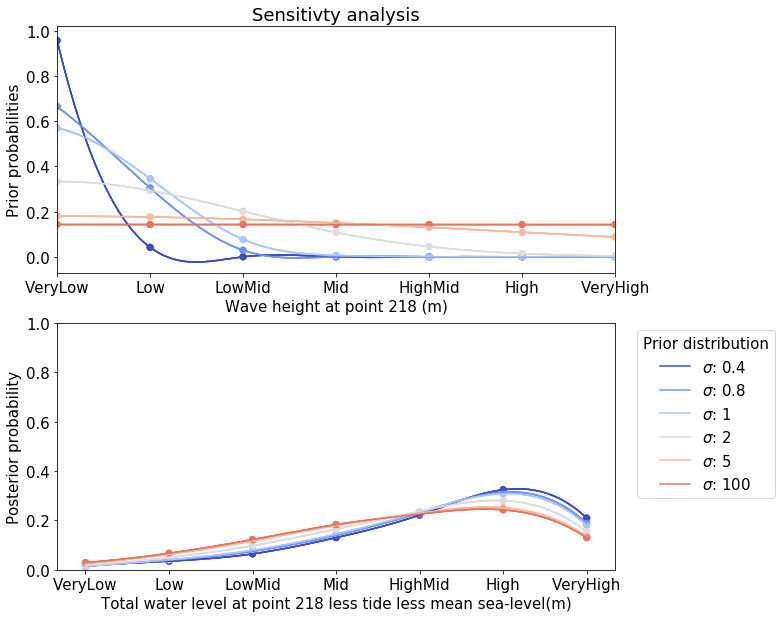

({0:       0.4       0.8       1.0       2.0       5.0       100.0
  0  0.015484  0.014350  0.014343  0.017391  0.025662  0.029011
  1  0.034831  0.038558  0.040267  0.049586  0.062506  0.066882
  2  0.064407  0.074535  0.078891  0.097472  0.116608  0.122396
  3  0.129991  0.139655  0.144467  0.164636  0.179526  0.182990
  4  0.221568  0.230680  0.233594  0.237166  0.229507  0.225852
  5  0.324060  0.314024  0.308222  0.280090  0.251251  0.242633
  6  0.209659  0.188198  0.180215  0.153657  0.134939  0.130237,
  1:       0.4       0.8       1.0       2.0       5.0       100.0
  0  0.015484  0.014350  0.014343  0.017391  0.025662  0.029011
  1  0.034831  0.038558  0.040267  0.049586  0.062506  0.066882
  2  0.064407  0.074535  0.078891  0.097472  0.116608  0.122396
  3  0.129991  0.139655  0.144467  0.164636  0.179526  0.182990
  4  0.221568  0.230680  0.233594  0.237166  0.229507  0.225852
  5  0.324060  0.314024  0.308222  0.280090  0.251251  0.242633
  6  0.209659  0.188198  0.180215

In [26]:
df_MSL_H_post = BNModel().univariant_sensitivity(ocean_model_dict,'Hs_point_218','VeryLow','TWL_point_218_less_Tide_less_MSL')
df_MSL_H_post

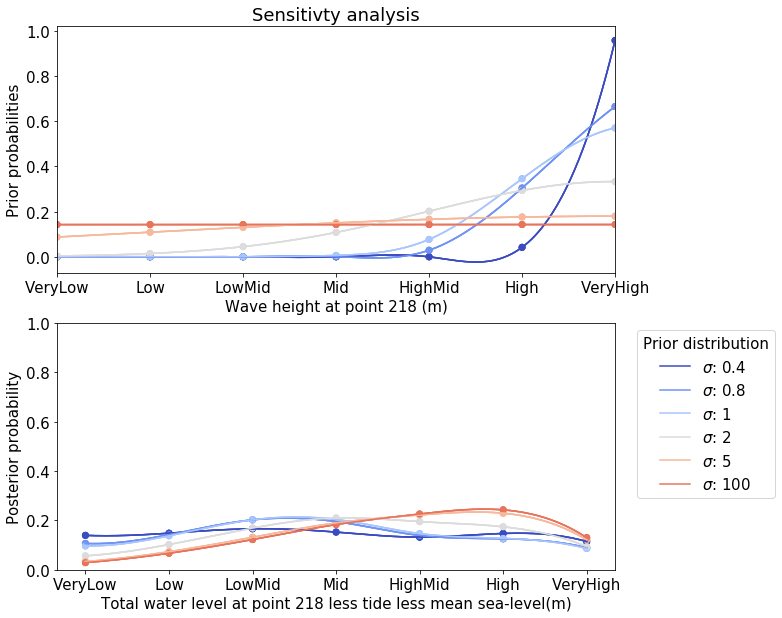

({0:       0.4       0.8       1.0       2.0       5.0       100.0
  0  0.139401  0.106713  0.096600  0.056338  0.033191  0.029030
  1  0.148185  0.142198  0.137513  0.102277  0.073167  0.066909
  2  0.166091  0.202160  0.202190  0.168786  0.131549  0.122435
  3  0.152650  0.195138  0.203712  0.209612  0.189727  0.183017
  4  0.132191  0.139103  0.146658  0.194837  0.221986  0.225833
  5  0.147093  0.125460  0.127272  0.174075  0.228988  0.242575
  6  0.114389  0.089229  0.086055  0.094075  0.121393  0.130202,
  1:       0.4       0.8       1.0       2.0       5.0       100.0
  0  0.139401  0.106713  0.096600  0.056338  0.033191  0.029030
  1  0.148185  0.142198  0.137513  0.102277  0.073167  0.066909
  2  0.166091  0.202160  0.202190  0.168786  0.131549  0.122435
  3  0.152650  0.195138  0.203712  0.209612  0.189727  0.183017
  4  0.132191  0.139103  0.146658  0.194837  0.221986  0.225833
  5  0.147093  0.125460  0.127272  0.174075  0.228988  0.242575
  6  0.114389  0.089229  0.086055

In [27]:
df_MSL_H_post = BNModel().univariant_sensitivity(ocean_model_dict,'Hs_point_218','VeryHigh','TWL_point_218_less_Tide_less_MSL')
df_MSL_H_post

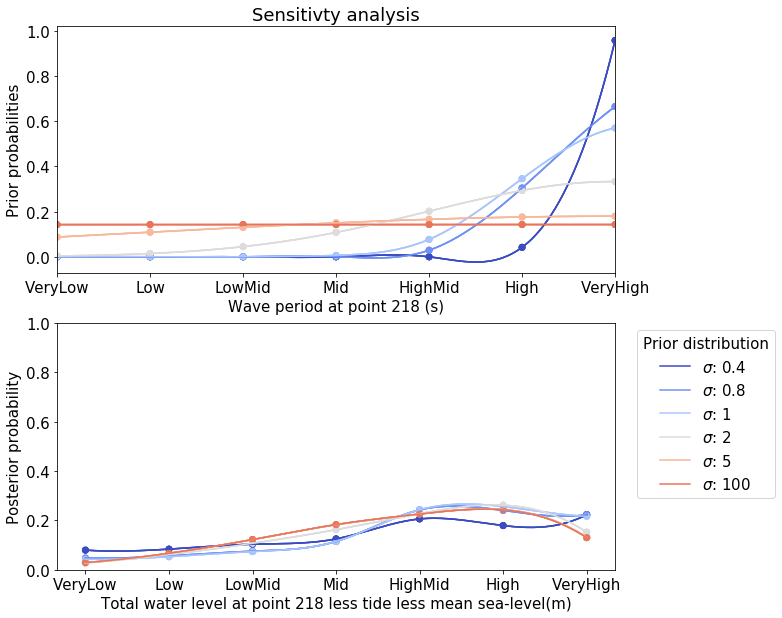

({0:       0.4       0.8       1.0       2.0       5.0       100.0
  0  0.079609  0.047371  0.042608  0.027803  0.028358  0.029019
  1  0.083668  0.056469  0.052980  0.061471  0.066814  0.066894
  2  0.103538  0.075457  0.073742  0.107136  0.122188  0.122412
  3  0.125113  0.114774  0.114941  0.162449  0.182428  0.182999
  4  0.205880  0.242316  0.243044  0.227263  0.225611  0.225841
  5  0.179006  0.240568  0.256212  0.261584  0.243791  0.242611
  6  0.223187  0.223044  0.216474  0.152294  0.130811  0.130225,
  1:       0.4       0.8       1.0       2.0       5.0       100.0
  0  0.079609  0.047371  0.042608  0.027803  0.028358  0.029019
  1  0.083668  0.056469  0.052980  0.061471  0.066814  0.066894
  2  0.103538  0.075457  0.073742  0.107136  0.122188  0.122412
  3  0.125113  0.114774  0.114941  0.162449  0.182428  0.182999
  4  0.205880  0.242316  0.243044  0.227263  0.225611  0.225841
  5  0.179006  0.240568  0.256212  0.261584  0.243791  0.242611
  6  0.223187  0.223044  0.216474

In [28]:
df_MSL_H_post = BNModel().univariant_sensitivity(ocean_model_dict,'Tm_point_218','VeryHigh','TWL_point_218_less_Tide_less_MSL')
df_MSL_H_post

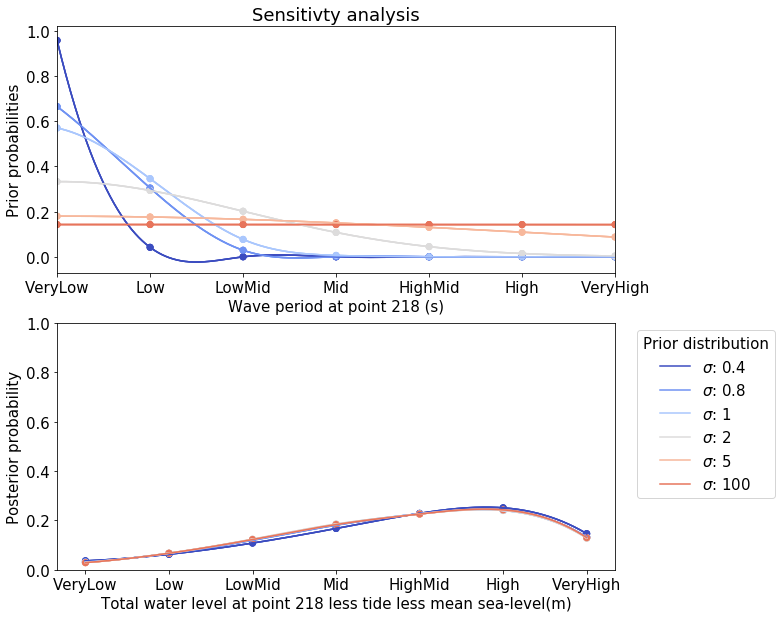

({0:       0.4       0.8       1.0       2.0       5.0       100.0
  0  0.036361  0.032120  0.031125  0.029567  0.029081  0.029020
  1  0.062642  0.065768  0.066537  0.067386  0.067065  0.066894
  2  0.108132  0.119445  0.121872  0.123954  0.122920  0.122413
  3  0.167170  0.180621  0.183351  0.185239  0.183698  0.183001
  4  0.228499  0.227342  0.226940  0.226024  0.225821  0.225841
  5  0.250909  0.241854  0.240122  0.239884  0.241937  0.242607
  6  0.146287  0.132850  0.130053  0.127946  0.129479  0.130223,
  1:       0.4       0.8       1.0       2.0       5.0       100.0
  0  0.036361  0.032120  0.031125  0.029567  0.029081  0.029020
  1  0.062642  0.065768  0.066537  0.067386  0.067065  0.066894
  2  0.108132  0.119445  0.121872  0.123954  0.122920  0.122413
  3  0.167170  0.180621  0.183351  0.185239  0.183698  0.183001
  4  0.228499  0.227342  0.226940  0.226024  0.225821  0.225841
  5  0.250909  0.241854  0.240122  0.239884  0.241937  0.242607
  6  0.146287  0.132850  0.130053

In [29]:
df_MSL_H_post = BNModel().univariant_sensitivity(ocean_model_dict,'Tm_point_218','VeryLow','TWL_point_218_less_Tide_less_MSL')
df_MSL_H_post

# Calculate TWL using binned TWL less tide less MSL

In [30]:
rep = 0

TWL_bin_means = {}
# Calculate the bin means
for bin_lower,bin_upper,bin_names in zip(
    ocean_model_dict['variables']['TWL_point_218_less_Tide_less_MSL']['bin_edges'][rep][:-1],
    ocean_model_dict['variables']['TWL_point_218_less_Tide_less_MSL']['bin_edges'][rep][1:],
    ocean_model_dict['variables']['TWL_point_218_less_Tide_less_MSL']['discretisation']['bin_names']
    ):
    TWL_bin_means.update({
        bin_names:np.mean([bin_lower,bin_upper])
    })
    
MSL_bin_means = {}
# Calculate the bin means
for bin_lower,bin_upper,bin_names in zip(
    ocean_model_dict['variables']['MSL']['bin_edges'][rep][:-1],
    ocean_model_dict['variables']['MSL']['bin_edges'][rep][1:],
    ocean_model_dict['variables']['MSL']['discretisation']['bin_names']
    ):
    MSL_bin_means.update({
        bin_names:np.mean([bin_lower,bin_upper])
    })
    
Tide_bin_means = {}
# Calculate the bin means
for bin_lower,bin_upper,bin_names in zip(
    ocean_model_dict['variables']['Tide']['bin_edges'][rep][:-1],
    ocean_model_dict['variables']['Tide']['bin_edges'][rep][1:],
    ocean_model_dict['variables']['Tide']['discretisation']['bin_names']
    ):
    Tide_bin_means.update({
        bin_names:np.mean([bin_lower,bin_upper])
    })
    


In [75]:
ocean_evidence_dict = {
    'Tide':[0.1,0.1,0.1,0.1,0.1,0.1,0.1],
    'MSL':[0.1,0.1,0.1,0.1,0.1,0.1,0.1]
}

ocean_model_dict = BNModel().add_evidence_to_dict(ocean_model_dict,ocean_evidence_dict)

# Set evidence and get beliefs
ocean_model_dict = BNModel().update_evidence(ocean_model_dict)

TWL_point_218_less_Tide_less_MSL_array = ocean_model_dict['variables']['TWL_point_218_less_Tide_less_MSL']['training_data'][0]
MSL_array = ocean_model_dict['variables']['MSL']['training_data_preprocessed'][0]
Tide_array = ocean_model_dict['variables']['Tide']['training_data_preprocessed'][0]

# TWL_point_218_less_Tide_less_MSL_array = [TWL_bin_means[x] for x in TWL_point_218_less_Tide_less_MSL_array] # use bin names to get bin values
# MSL_array = [MSL_bin_means[x] for x in MSL_array] # use bin names to get bin values
# Tide_array = [Tide_bin_means[x] for x in Tide_array] # use bin names to get bin values

# TWL_dist = [TWL_point_218_less_Tide_less_MSL+Tide+MSL for TWL_point_218_less_Tide_less_MSL,MSL,Tide in zip(TWL_point_218_less_Tide_less_MSL_array,MSL_array,Tide_array)]

# print(np.min(TWL_dist))
# print(np.max(TWL_dist))
# print(np.median(TWL_dist))


Text(0.5, 0, 'Total water level less tide less mean sea-level')

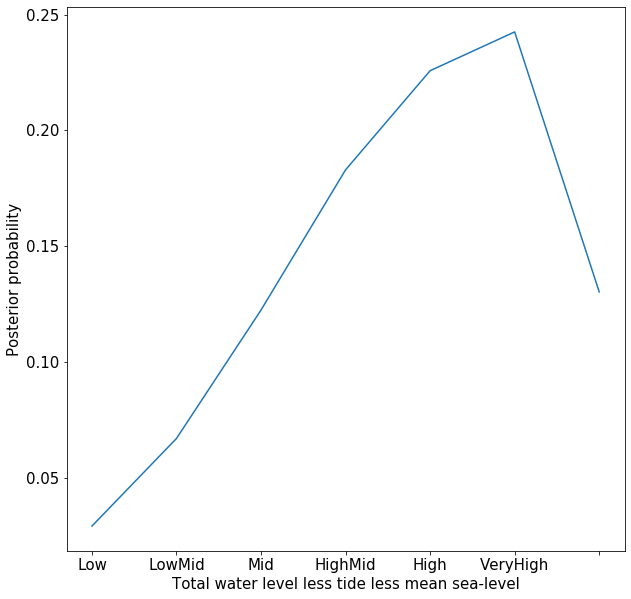

In [76]:

fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((1,1),(0,0))

test_dict = ocean_model_dict['variables']['TWL_point_218_less_Tide_less_MSL']['resulting_probs'][0]

ax1.plot(list(test_dict.values()))

ax1.set_xticklabels(ocean_model_dict['variables']['TWL_point_218_less_Tide_less_MSL']['discretisation']['bin_names'])
ax1.set_ylabel("Posterior probability")
ax1.set_xlabel("Total water level less tide less mean sea-level")

In [68]:
test_dict

{'VeryLow': 0.07831296350706395,
 'Low': 0.2897454897700388,
 'LowMid': 0.31474140142658186,
 'Mid': 0.1278310193563877,
 'HighMid': 0.08143904264980303,
 'High': 0.06483699077073565,
 'VeryHigh': 0.04309309251938906}

# MSL Priors based on Future Projections

## Get the distribution of MSL data currently

In [32]:
def grouping_bins(data):
    grouped_dict = {}

    for bin_name in np.unique(data):
        grouped_dict.update({
            bin_name:len(data[data==bin_name])
        })
        
    df_grouped = pd.DataFrame.from_dict(grouped_dict,orient='index')
    
    return(df_grouped)

In [33]:
def descretiser(bin_edges,bin_names,data_array):
    
    discretised_array = np.empty(len(data_array)).astype(str)
    
    for lower, upper, bin_name in zip(
        bin_edges[:-1],
        bin_edges[1:],
        bin_names):
        
        discretised_array[(data_array>lower)&(data_array<upper)] = bin_name

        # Now Include out of bounds values in the upper and lower bins
        discretised_array[data_array<np.min(bin_edges)] = bin_names[0]
        discretised_array[data_array>np.max(bin_edges)] = bin_names[-1]
        
    return(discretised_array)
                    

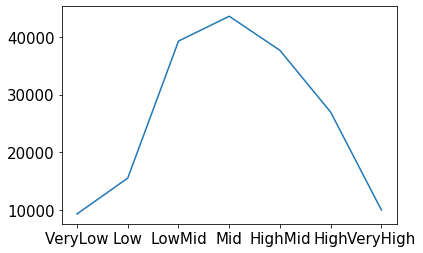

In [34]:
# Bin the MSL data
MSL_data = ocean_model_dict['variables']['MSL']['training_data'][0]

# Grouping the bins 
MSL_bins_grouped = grouping_bins(MSL_data)

# Put the bins in the right order
df_MSL_distribution = MSL_bins_grouped.reindex(ocean_model_dict['variables']['MSL']['discretisation']['bin_names'])

# Plot the data
plt.plot(df_MSL_distribution)

## Add the Global average for now

In [35]:
# Get the preprocessed data to add to
MSL_training_data_preprocessed = ocean_model_dict['variables']['MSL']['training_data_preprocessed'][0]
MSL_testing_data_preprocessed = ocean_model_dict['variables']['MSL']['testing_data_preprocessed'][0]

# Print some stats to get an idea of how adding SLR will affect the data
print(np.min(MSL_training_data_preprocessed))
print(np.max(MSL_training_data_preprocessed))
print(np.mean(MSL_training_data_preprocessed))
print(np.median(MSL_training_data_preprocessed))

-0.227352272625601
0.207587280811012
-0.0005629531961847237
-0.0010065793034697


In [36]:
# Based on a 2 mm/yr rate
mean_SLR_2050 = 2*29/1000
mean_SLR_2100 = 2*59/1000

# Get MSLs adjusted for regional sea level rise
MSL_2050 = MSL_training_data_preprocessed+mean_SLR_2050
MSL_2100 = MSL_training_data_preprocessed+mean_SLR_2100

In [37]:
# Using the bins from before, discretise the results
bin_edges = ocean_model_dict['variables']['MSL']['bin_edges'][0]
bin_names = ocean_model_dict['variables']['MSL']['discretisation']['bin_names']

# Normalise the data
df_MSL_2021 = df_MSL_distribution/np.nansum(df_MSL_distribution)

# Calculated discretised MSL for the scenarios
MSL_2050 = MSL_training_data_preprocessed+mean_SLR_2050
MSL_2050_discretised = descretiser(bin_edges,bin_names,MSL_2050)
df_MSL_2050 = grouping_bins(MSL_2050_discretised)
df_MSL_2050 = df_MSL_2050.reindex(ocean_model_dict['variables']['MSL']['discretisation']['bin_names'])
df_MSL_2050[df_MSL_2050.isna()] = 0.001
df_MSL_2050 = df_MSL_2050/np.nansum(df_MSL_2050)

# Calculated discretised MSL for the scenarios
MSL_2100 = MSL_training_data_preprocessed+mean_SLR_2100
MSL_2100_discretised = descretiser(bin_edges,bin_names,MSL_2100)
df_MSL_2100 = grouping_bins(MSL_2100_discretised)
df_MSL_2100 = df_MSL_2100.reindex(ocean_model_dict['variables']['MSL']['discretisation']['bin_names'])
df_MSL_2100[df_MSL_2100.isna()] = 0.001
df_MSL_2100 = df_MSL_2100/np.nansum(df_MSL_2100)


### Set evidence of 2050

In [38]:
# Create dict of evidence
MSL_2050_evidence_dict = {
    'MSL':list(df_MSL_2050[0])
}

# Add evidence for MSL to the model dict
ocean_model_dict = BNModel().add_evidence_to_dict(ocean_model_dict,MSL_2050_evidence_dict)

# Set evidence and get beliefs
ocean_model_dict = BNModel().update_evidence(ocean_model_dict)

# TWL posterior 2050
TWL_MSL_2050_posterior_dict = ocean_model_dict['variables']['TWL_point_218']['resulting_probs'][0]
df_TWL_MSL_2050_posterior = pd.DataFrame.from_dict(TWL_MSL_2050_posterior_dict,orient='index')

KeyError: 'TWL_point_218'

In [ ]:
# Create dict of evidence
MSL_2100_evidence_dict = {
    'MSL':list(df_MSL_2100[0])
}

# Add evidence for MSL to the model dict
ocean_model_dict = BNModel().add_evidence_to_dict(ocean_model_dict,MSL_2100_evidence_dict)

# TWL posterior 2100
TWL_MSL_2100_posterior_dict = ocean_model_dict['variables']['TWL_point_218']['resulting_probs'][0]
df_TWL_MSL_2100_posterior = pd.DataFrame.from_dict(TWL_MSL_2100_posterior_dict,orient='index')

In [ ]:
# get the original data to compare it to
TWL_training_dict = ocean_model_dict['variables']['TWL_point_218']['training_data'][0]
df_TWL_training = grouping_bins(TWL_training_dict)
df_TWL_training = df_TWL_training.reindex(ocean_model_dict['variables']['MSL']['discretisation']['bin_names'])
df_TWL_training[df_TWL_training.isna()] = 0.001
df_TWL_training = df_TWL_training/np.nansum(df_TWL_training)

# Create an extra set of dfs for data as a fraction of original
TWL_MSL_2050 = [(ind,y/x) for ind,x,y in zip(df_TWL_training.index,df_TWL_training[0],df_TWL_MSL_2050_posterior[0])]
TWL_MSL_2100 = [(ind,y/x) for ind,x,y in zip(df_TWL_training.index,df_TWL_training[0],df_TWL_MSL_2100_posterior[0])]
df_TWL_MSL_2050 = pd.DataFrame(TWL_MSL_2050).set_index(0)
df_TWL_MSL_2100 = pd.DataFrame(TWL_MSL_2100).set_index(0)

In [ ]:

# Set up the figure
fig = plt.figure(figsize=(10,15))
fig.subplots_adjust(hspace=0.5)
ax1 = plt.subplot2grid((3,1),(0,0))
ax2 = plt.subplot2grid((3,1),(1,0))
ax3 = plt.subplot2grid((3,1),(2,0))

# Plot MSL data and prior distributions
ax1.plot(df_MSL_2021,c='k')
ax1.plot(df_MSL_2050,c='b')
ax1.plot(df_MSL_2100,c='r')

# Plot posterior distributions compared to original data
output_2021, = ax2.plot(df_TWL_training,c='k')
output_2050, = ax2.plot(df_TWL_MSL_2050_posterior,c='b')
output_2100, = ax2.plot(df_TWL_MSL_2100_posterior,c='r')

# Plot posterior distributions as a fraction of the original data
output_2050, = ax3.plot(df_TWL_MSL_2050,c='b')
output_2100, = ax3.plot(df_TWL_MSL_2100,c='r')
ax3_xlims = ax3.get_xlim()
ax3.plot(ax3_xlims,[1,1],c='0.5',ls='--')
ax3.set_xlim(ax3_xlims)

# Format the graph
ax1.set_ylabel('Probability')
ax1.set_xlabel('Mean Sea Level')
ax2.set_ylabel('Probability')
ax2.set_xlabel('Total Water Level')
ax3.set_ylabel('Probability/Probability')
ax3.set_xlabel('Total Water Level')

ax1.legend([output_2021,output_2050,output_2100],['Present','2050','2100'])


# Load in some IPCC RSL Data

In [ ]:
# The IPCC data (Openheimer et al., 2019, IPCC Ch4) is relative to the 1983-2005
# Antonio's data is 1993-2017

# It's not clear to me right now if the IPCC data is relative to the 1983-2005 value globally averaged, 
# or if it varies regionally


In [ ]:
import xarray as xr
tarawa_lat = 1.333
tarawa_long = 173

In [ ]:
# Load the RSLD from IPCC, chapter
ds_RSLR_2040_rcp26 = xr.open_dataset (r'C:\Users\shannonb\Documents\Model_and_data\Dataset\Additional_data\Sea_levels\Data\Chapter4_SM\SM4.2\rsl_26_2040.nc')
ds_RSLR_2040_rcp45 = xr.open_dataset (r'C:\Users\shannonb\Documents\Model_and_data\Dataset\Additional_data\Sea_levels\Data\Chapter4_SM\SM4.2\rsl_45_2040.nc')
ds_RSLR_2040_rcp85 = xr.open_dataset (r'C:\Users\shannonb\Documents\Model_and_data\Dataset\Additional_data\Sea_levels\Data\Chapter4_SM\SM4.2\rsl_85_2040.nc')

ds_RSLR_2055_rcp26 = xr.open_dataset (r'C:\Users\shannonb\Documents\Model_and_data\Dataset\Additional_data\Sea_levels\Data\Chapter4_SM\SM4.2\rsl_26_2055.nc')
ds_RSLR_2055_rcp45 = xr.open_dataset (r'C:\Users\shannonb\Documents\Model_and_data\Dataset\Additional_data\Sea_levels\Data\Chapter4_SM\SM4.2\rsl_45_2055.nc')
ds_RSLR_2055_rcp85 = xr.open_dataset (r'C:\Users\shannonb\Documents\Model_and_data\Dataset\Additional_data\Sea_levels\Data\Chapter4_SM\SM4.2\rsl_85_2055.nc')

ds_RSLR_2090_rcp26 = xr.open_dataset (r'C:\Users\shannonb\Documents\Model_and_data\Dataset\Additional_data\Sea_levels\Data\Chapter4_SM\SM4.2\rsl_26_2090.nc')
ds_RSLR_2090_rcp45 = xr.open_dataset (r'C:\Users\shannonb\Documents\Model_and_data\Dataset\Additional_data\Sea_levels\Data\Chapter4_SM\SM4.2\rsl_45_2090.nc')
ds_RSLR_2090_rcp85 = xr.open_dataset (r'C:\Users\shannonb\Documents\Model_and_data\Dataset\Additional_data\Sea_levels\Data\Chapter4_SM\SM4.2\rsl_85_2090.nc')


In [ ]:
# Get the RSLR for Tarawa specifically
RSLR_2040_rcp26 = float(ds_RSLR_2040_rcp26['slr_md'].sel(x=tarawa_long,y=tarawa_lat,method='nearest'))
RSLR_2055_rcp26 = float(ds_RSLR_2055_rcp26['slr_md'].sel(x=tarawa_long,y=tarawa_lat,method='nearest'))
RSLR_2090_rcp26 = float(ds_RSLR_2090_rcp26['slr_md'].sel(x=tarawa_long,y=tarawa_lat,method='nearest'))

RSLR_2040_rcp45 = float(ds_RSLR_2040_rcp45['slr_md'].sel(x=tarawa_long,y=tarawa_lat,method='nearest'))
RSLR_2055_rcp45 = float(ds_RSLR_2055_rcp45['slr_md'].sel(x=tarawa_long,y=tarawa_lat,method='nearest'))
RSLR_2090_rcp45 = float(ds_RSLR_2090_rcp45['slr_md'].sel(x=tarawa_long,y=tarawa_lat,method='nearest'))

RSLR_2040_rcp85 = float(ds_RSLR_2040_rcp85['slr_md'].sel(x=tarawa_long,y=tarawa_lat,method='nearest'))
RSLR_2055_rcp85 = float(ds_RSLR_2055_rcp85['slr_md'].sel(x=tarawa_long,y=tarawa_lat,method='nearest'))
RSLR_2090_rcp85 = float(ds_RSLR_2090_rcp85['slr_md'].sel(x=tarawa_long,y=tarawa_lat,method='nearest'))

#### These values are relative to PI?? If so, I doubt Antonio's numbers are PI---so this needs to be adjusted for

### Use RCP Scenarios to set evidence

In [ ]:
# Get MSLs adjusted for regional sea level rise
MSL_2040_rcp26 = MSL_training_data_preprocessed+RSLR_2040_rcp26
MSL_2055_rcp26 = MSL_training_data_preprocessed+RSLR_2055_rcp26
MSL_2090_rcp26 = MSL_training_data_preprocessed+RSLR_2090_rcp26

MSL_2040_rcp45 = MSL_training_data_preprocessed+RSLR_2040_rcp45
MSL_2055_rcp45 = MSL_training_data_preprocessed+RSLR_2055_rcp45
MSL_2090_rcp45 = MSL_training_data_preprocessed+RSLR_2090_rcp45

MSL_2040_rcp85 = MSL_training_data_preprocessed+RSLR_2040_rcp85
MSL_2055_rcp85 = MSL_training_data_preprocessed+RSLR_2055_rcp85
MSL_2090_rcp85 = MSL_training_data_preprocessed+RSLR_2090_rcp85

In [ ]:
def test_model(evidence_array,model_dict):

    # Adjust MSL for difference between antonio data and IPCC data
    SLR_adjustment = 2*11/1000
    evidence_array -= SLR_adjustment
    
    # Dicretise the data
    MSL_discretised = descretiser(bin_edges,bin_names,evidence_array)
    df_MSL = grouping_bins(MSL_discretised)
    df_MSL = df_MSL.reindex(model_dict['variables']['MSL']['discretisation']['bin_names'])
    df_MSL[df_MSL.isna()] = 0.001
    df_MSL = df_MSL/np.nansum(df_MSL)
    
    # Create dict of evidence
    MSL_evidence_dict = {
        'MSL':list(df_MSL[0])
    }

    # Add evidence for MSL to the model dict
    model_dict = BNModel().add_evidence_to_dict(model_dict,MSL_evidence_dict)

    # Set evidence and get beliefs
    model_dict = BNModel().update_evidence(model_dict)

    # TWL posterior 2100
    TWL_MSL_posterior_dict = model_dict['variables']['TWL_point_218']['resulting_probs'][0]
    df_TWL_posterior = pd.DataFrame.from_dict(TWL_MSL_posterior_dict,orient='index')
    
    return(df_TWL_posterior,df_MSL)

In [ ]:
IPCC_posteriors_dict = {}
MSL_prior_dict = {}

MSL_array_list = [MSL_2040_rcp26,MSL_2055_rcp26,MSL_2090_rcp26,MSL_2040_rcp45,MSL_2055_rcp45,MSL_2090_rcp45,MSL_2040_rcp85,MSL_2055_rcp85,MSL_2090_rcp85]

for array, label in zip(MSL_array_list,
                        ['RCP2.6, 2040','RCP2.6, 2055','RCP2.6, 2090','RCP4.5, 2040','RCP4.5, 2055','RCP4.5, 2090','RCP8.5, 2040','RCP8.5, 2055','RCP8.5, 2090']):
    
    df_TWL_posterior, df_MSL = test_model(array, ocean_model_dict)
    
    IPCC_posteriors_dict.update({
        label:df_TWL_posterior
    })
    
    MSL_prior_dict.update({
        label:df_MSL
    })

In [ ]:

# Set up the figure
fig = plt.figure(figsize=(10,15))
fig.subplots_adjust(hspace=0.5)
ax1 = plt.subplot2grid((3,1),(0,0))
ax2 = plt.subplot2grid((3,1),(1,0))
ax3 = plt.subplot2grid((3,1),(2,0))

# # Plot MSL data and prior distributions
# ax1.plot(df_MSL_2021,c='k')
# ax1.plot(df_MSL_2050,c='b')
# ax1.plot(df_MSL_2100,c='r')
for key,df_prior in MSL_prior_dict.items():
    ax1.plot(df_prior)

# # Plot posterior distributions compared to original data
# output_2021, = ax2.plot(df_TWL_training,c='k')
# output_2050, = ax2.plot(df_TWL_MSL_2050_posterior,c='b')
# output_2100, = ax2.plot(df_TWL_MSL_2100_posterior,c='r')
outputs = []

for key,posterior_array in IPCC_posteriors_dict.items():
    output, = ax2.plot(posterior_array)
    outputs.append(output)

# # Plot posterior distributions as a fraction of the original data
# output_2050, = ax3.plot(df_TWL_MSL_2050,c='b')
# output_2100, = ax3.plot(df_TWL_MSL_2100,c='r')
# ax3_xlims = ax3.get_xlim()
# ax3.plot(ax3_xlims,[1,1],c='0.5',ls='--')
# ax3.set_xlim(ax3_xlims)

# Format the graph
ax1.set_ylabel('Probability')
ax1.set_xlabel('Mean Sea Level')
ax2.set_ylabel('Probability')
ax2.set_xlabel('Total Water Level')
ax3.set_ylabel('Probability/Probability')
ax3.set_xlabel('Total Water Level')

ax1.legend(outputs,IPCC_posteriors_dict.keys())
